In [54]:
# import libraries
import pandas as pd
import numpy as np
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
from random import shuffle

In [2]:
# go through registration and get token
socrata_token = 'U8U45oyFNQgOwzwhcsOYanoYs'

# access datasets from NYC OPEN DATA via API; I only use datasets with respect to yellow and green taxi (FHV dataset does not include payment data and is generally of different nature)
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = {'2019YT' : '2upf-qytp', '2019GT' : 'q5mz-t52e', '2020YT' : 'kxp8-n2sj', '2020GT' : 'pkmi-4kfn'}
client = Socrata(socrata_domain, socrata_token)
client.timeout = 100000

# get datasets and tranform them into pandas DataFrame format
# initial datasets include all-year data: select only December data in 2019 and only January data in 2020
# in general monthly datasets are large and based on the task questions I guess downloading all columns is redundant, however, since no time and memory constraints were stressed I decided to get the whole data
# for some reason 2019 and 2020 datasets also include a few rows corresponding to different random years (some bag), so I only select rows with the year in question

# the following code downloads yellow-taxi dataset for December 2019 and saves dataframe to pkl format (other 3 datasets are handled in the same fashion)
#results = client.get(socrata_dataset_identifier['2019YT'], where = 'date_extract_m(tpep_pickup_datetime) = 12 and date_extract_y(tpep_pickup_datetime) = 2019', limit = 7000000)
#df = pd.DataFrame.from_dict(results)
#df.to_pickle('data_2019_yt.pkl')

# read 4 datasets
yt_dec = pd.read_pickle('data_2019_yt.pkl')
gt_dec = pd.read_pickle('data_2019_gt.pkl')
yt_jan = pd.read_pickle('data_2020_yt.pkl')
gt_jan = pd.read_pickle('data_2020_gt.pkl')


In [2]:
gt_dec = pd.read_pickle('data_2019_gt.pkl')

In [27]:
gt_dec_ta = [*(map(float, gt_dec['total_amount']))]

(-10.0, 100.0)

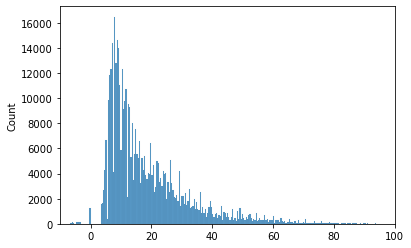

In [3]:
ax = sns.histplot(data=gt_dec, x = [*(map(float, gt_dec['total_amount']))])
plt.xlim(-10, 100)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-200.0, 500.0)

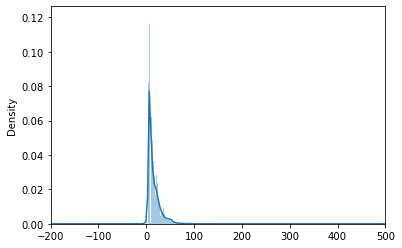

In [15]:
ax = sns.distplot([*(map(float, gt_dec['fare_amount']))], bins = 2000, norm_hist=True)
plt.xlim(-200, 500)

In [14]:
min([*(map(float, gt_dec['total_amount']))])

-200.0

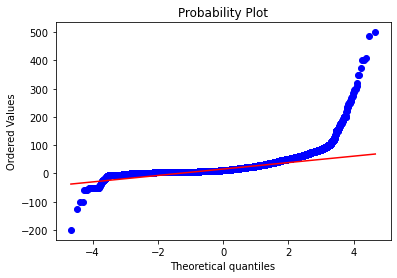

In [7]:
stats.probplot([*(map(float, gt_dec['fare_amount']))], dist = 'norm', plot=pylab)
pylab.show()

In [9]:
stat, p = stats.shapiro([*(map(float, gt_dec['fare_amount']))])
print(stat, p)

0.7789613008499146 0.0


In [10]:
stat, p = stats.normaltest([*(map(float, gt_dec['fare_amount']))])
print(stat, p)

339242.8083198158 0.0


In [16]:
yt_dec = pd.read_pickle('data_2019_yt.pkl')

In [24]:
yt_dec_ta = [*(map(float, yt_dec['total_amount']))]

In [28]:
yt_jan = pd.read_pickle('data_2020_yt.pkl')

In [29]:
yt_jan_ta = [*(map(float, yt_jan['total_amount']))]

In [32]:
gt_jan = pd.read_pickle('data_2020_gt.pkl')

In [33]:
gt_jan_ta = [*(map(float, gt_jan['total_amount']))]

In [38]:
final = gt_jan_ta+yt_jan_ta+yt_dec_ta+gt_dec_ta

In [41]:
min(final)

-1472.8

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-10.0, 100.0)

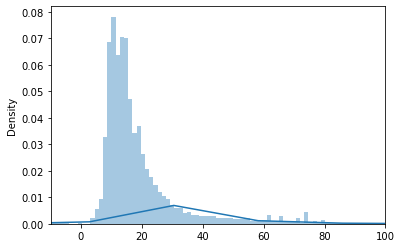

In [58]:
ax = sns.distplot(final[:8000000], bins = 4000)
plt.xlim(-10, 100)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-10.0, 100.0)

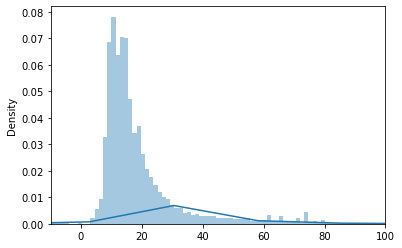

In [64]:

ax = sns.distplot(final[:8000000], bins = 4000)
plt.xlim(-10, 100)

In [62]:
shuffle(final)

In [65]:
len(final)

14199588

In [66]:
gt_dec

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2019-12-07T06:57:38.000,2019-12-07T07:05:59.000,N,1,7,7,1,1.06,7,0,0.5,0,0,0.3,7.8,2,1,0
1,2,2019-12-07T07:10:01.000,2019-12-07T07:25:15.000,N,1,7,82,1,2.21,11.5,0,0.5,0,0,0.3,12.3,2,1,0
2,2,2019-12-07T07:29:01.000,2019-12-07T07:35:31.000,N,1,129,129,1,0.86,6,0,0.5,0,0,0.3,6.8,2,1,0
3,2,2019-12-13T01:11:59.000,2019-12-13T01:26:42.000,N,1,179,260,1,1.62,10.5,0,0.5,0,0,0.3,11.3,2,1,0
4,2,2019-12-15T00:37:28.000,2019-12-15T00:43:06.000,N,1,7,7,1,0.54,5,0,0.5,0,0,0.3,5.8,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450578,NaN,2019-12-31T23:26:00.000,2019-12-31T23:54:00.000,NaN,NaN,35,130,NaN,10.02,48.85,2.75,0,0,0,0.3,51.9,NaN,NaN,NaN
450579,NaN,2019-12-31T23:02:00.000,2019-12-31T23:16:00.000,NaN,NaN,76,61,NaN,2.27,23.31,2.75,0,0,0,0.3,26.36,NaN,NaN,NaN
450580,NaN,2019-12-31T23:24:00.000,2019-12-31T23:40:00.000,NaN,NaN,185,247,NaN,9.35,27.27,2.75,0,0,0,0.3,30.32,NaN,NaN,NaN
450581,NaN,2019-12-31T23:16:00.000,2019-12-31T23:37:00.000,NaN,NaN,51,126,NaN,-7.16,35.95,2.75,0.5,0,0,0.3,39.5,NaN,NaN,NaN
